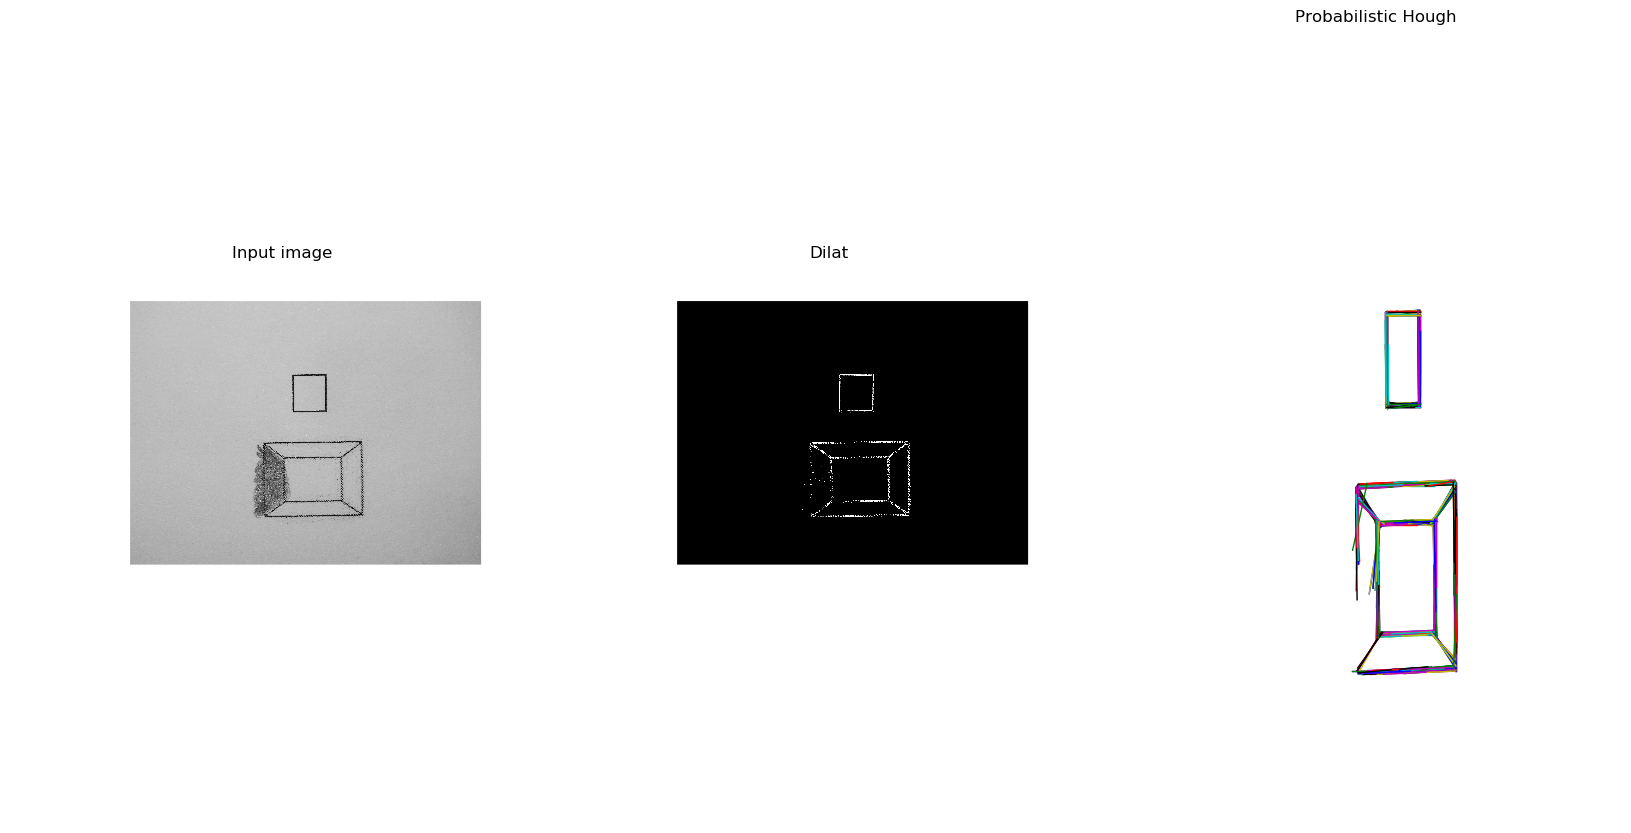

In [34]:
get_ipython().magic('matplotlib inline')
from pylab import *
import skimage
import img
import ipywidgets as widgets
import skimage.morphology as mp
from skimage import data, io, filters, exposure, feature
from skimage.filters import rank
from skimage.util.dtype import convert
from skimage import img_as_float, img_as_ubyte
from skimage.io import imshow
from skimage.io import imshow_collection
from skimage.viewer import ImageViewer
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt  
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from IPython.core.display import clear_output
from skimage import data, img_as_float
from skimage import exposure
from skimage.morphology import disk
from skimage import measure
from skimage.feature import canny
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
import warnings
warnings.simplefilter("ignore")




probe1=io.imread("img/probe_cam5.JPG")


    
probe1 = rgb2gray(probe1)
probe1 = img_as_ubyte(probe1)
med= (filters.median(probe1, disk(2)))
#imshow(med,cmap=plt.cm.gray)

gauss = filters.gaussian(img_as_ubyte(med), sigma=2)
#imshow(gauss,cmap=plt.cm.gray)
   
'''perc=4
img = img_as_float(gauss)
MIN = np.percentile(img, perc)
MAX = np.percentile(img, 100-perc)

norm = (img - MIN) / (MAX - MIN)
norm[norm > 1] = 1
norm[norm < 0] = 0'''
    
#imshow(norm,cmap=plt.cm.gray)


sobel =filters.sobel(gauss)**0.5
#imshow(sobel,cmap=plt.cm.gray)
   
thresh = 0.28
binary = (sobel > thresh) 
binary = np.uint8(binary) # unit64 => unit8
#imshow(binary,cmap=plt.cm.gray)
     
dilat = mp.dilation(binary)
#imshow(dilat,cmap=plt.cm.gray)


lines = probabilistic_hough_line(dilat, line_length=300,
                                 line_gap=120)




fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10), sharex=True, sharey=True)

ax1.imshow(probe1, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(dilat, cmap=plt.cm.gray)
ax2.set_title('Dilat')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')


for line in lines:
    p0, p1 = line
    ax3.plot((p0[0], p1[0]), (p0[1], p1[1]))

ax3.set_title('Probabilistic Hough')
ax3.set_axis_off()
ax3.set_adjustable('box-forced')

    
    
#fig = plt.figure(figsize=(15,5))
#imshow(dilat,cmap=plt.cm.gray)


    
    
    




